In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
X=np.array([[0,1,0,1],
           [1,0,1,1],
           [0,0,0,1],
            [1,0,1,0]])
y=np.array([0,1,0,1])

In [3]:
counts={}
for label in np.unique(y):
    print(label)
    counts[label] = X[y==label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

0
1
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                              stratify=cancer.target,
                                              random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)

print('Accuracy of training set: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test set: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training set: 0.988
Accuracy of test set: 0.951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],
               feature_names=cancer.feature_names,impurity=False,filled=True)

In [7]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

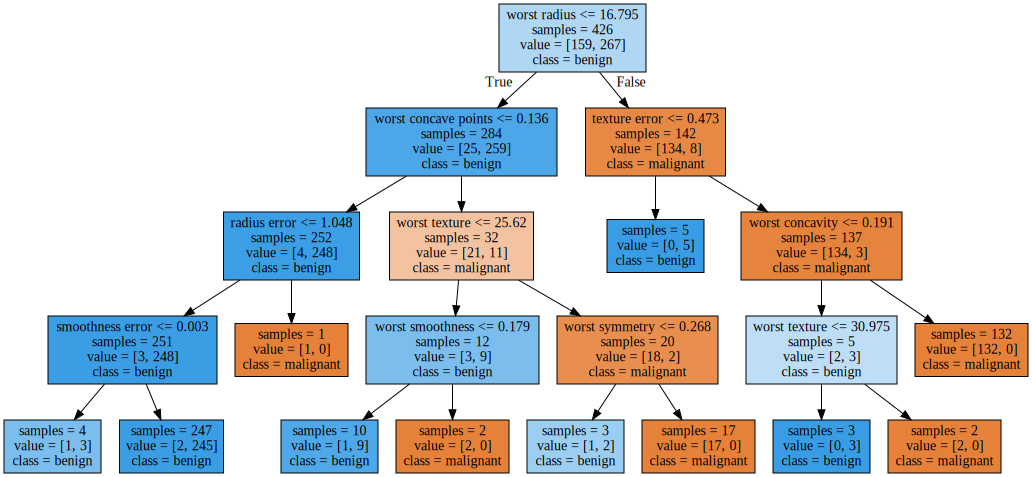

In [8]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [9]:
print('Feature importances:\n{}'.format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


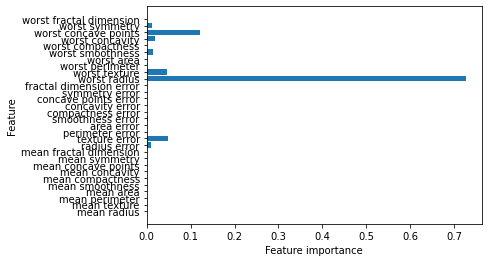

In [10]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


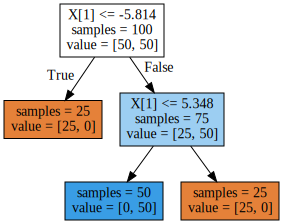

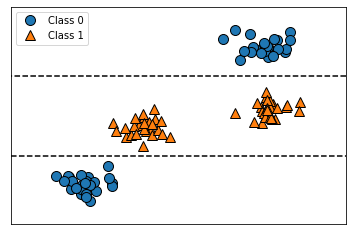

In [11]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

In [12]:
ram_prices = pd.read_csv("C:/Users/User/Desktop/RAM_price.csv")

In [13]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


Text(0, 0.5, 'Price in $/Mbyte')

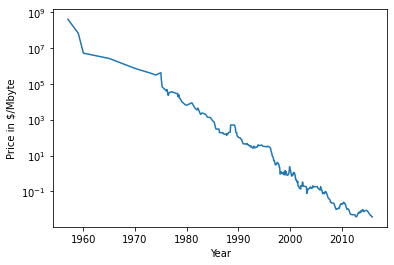

In [14]:
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

In [15]:
from sklearn.tree import DecisionTreeRegressor
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]

In [16]:
X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

X_all=ram_prices.date[:,np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

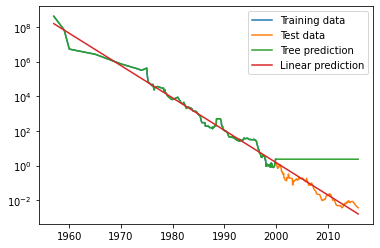

In [17]:
plt.semilogy(data_train.date,data_train.price)
plt.semilogy(data_test.date,data_test.price)
plt.semilogy(ram_prices.date,price_tree)
plt.semilogy(ram_prices.date,price_lr)
plt.legend(['Training data','Test data','Tree prediction','Linear prediction'])
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

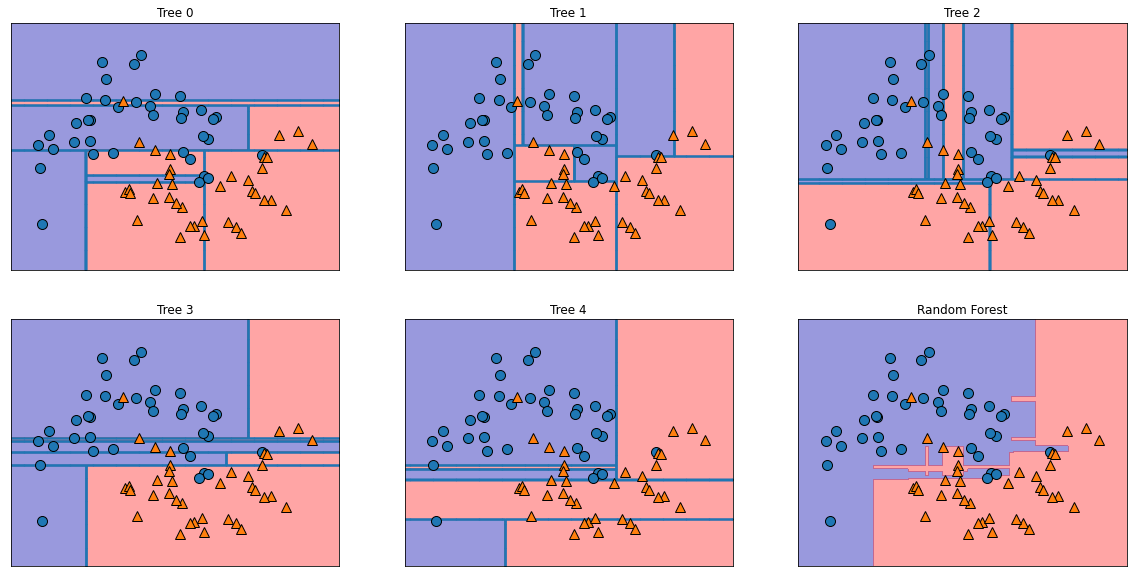

In [19]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print('Accuracy on training set :{:.3f}'.format(forest.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test,y_test)))

Accuracy on training set :1.000
Accuracy on test set: 0.972


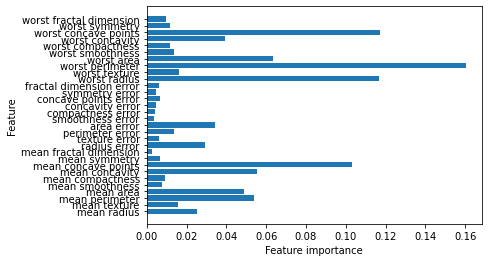

In [21]:
plot_feature_importances_cancer(forest)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                    stratify=cancer.target,random_state=0)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('ACcuracy on test set: {:.3f}'.format(gbrt.score(X_test,y_test)))

Accuracy on training set: 1.000
ACcuracy on test set: 0.958


In [23]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print('Accuracy on training set: {:.3f}'.format(gbrt.score(X_test,y_test)))
print('Accuracy on test set: {:.3f}'.format(gbrt.score(X_test,y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.965


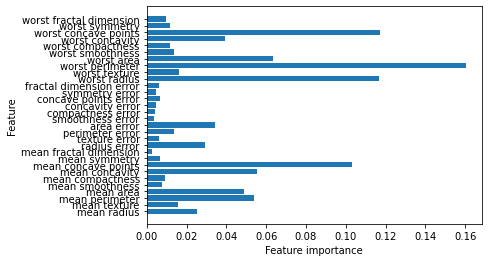

In [24]:
plot_feature_importances_cancer(forest)

In [25]:
from sklearn.datasets import make_blobs

Text(0, 0.5, 'Feature 1')

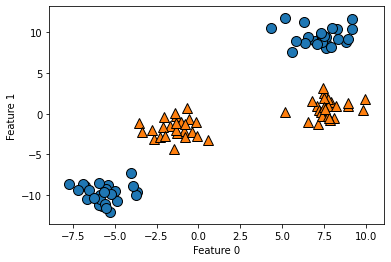

In [26]:
X,y = make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

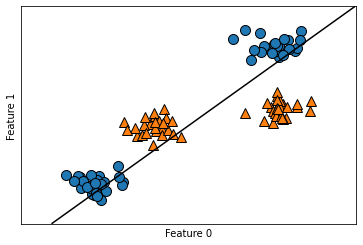

In [27]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

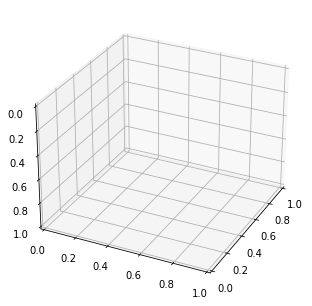

In [30]:
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure = plt.figure()

ax=Axes3D(figure,elev=-152,azim=-26)
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
           cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
          cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 **2')

In [33]:
X_new[mask,0]

array([-3.6573384 ,  7.63027116, -5.27144331,  8.2634157 ,  6.96767867,
       -7.74064658, -5.41087235,  7.61227907,  8.81545663,  7.40292703,
        5.17209648,  6.5342397 ,  7.59635095, -4.86090778,  5.5987887 ,
       -4.98457333,  6.28516091, -5.54704895, -3.71313291, -5.73423505,
        7.29433984, -5.91698308,  8.91111219, -5.24568764,  7.40565933,
        8.32813617, -5.8559969 , -5.9232326 , -6.65506667,  7.49985237,
       -5.89890454, -6.78464252,  6.34526126,  9.19642422,  7.94310647,
       -6.87196564,  7.31294296,  7.09022949,  9.17061801, -5.59306958,
       -6.55585067,  5.82259795, -6.25582944, -5.66388829,  4.33366829,
       -7.18598198, -3.91937544,  8.00405631, -4.00405937, -5.52677154])

In [34]:
X_new[~mask,0]

array([-1.72161036,  7.0778163 , -1.36579859, -2.66521206,  7.91767139,
       -1.41284184, -1.01519039, -0.84779249,  7.48006237,  7.71454967,
       -2.27579204, -1.25668449,  7.1895354 , -2.10476115, -0.6560501 ,
        8.90864428,  8.09770696, -0.79757091,  9.92897802, -1.36106796,
       -0.57094074,  7.46833627,  7.71891403, -0.35871708,  8.23775366,
        7.31164869,  7.49954   ,  7.15741276, -0.05919026, -2.04751119,
       -3.57485395,  9.85640178,  6.77299778, -1.45137298,  7.88011867,
        6.57242965,  5.19332032, -1.34457765, -2.76538887,  7.38527197,
       -0.13342473, -0.77886564, -3.35967956,  8.937858  , -1.96692264,
        7.49348552,  7.74040382,  0.54431911,  7.81296089,  7.53581859])

Text(0.5, 0, 'feature **2')

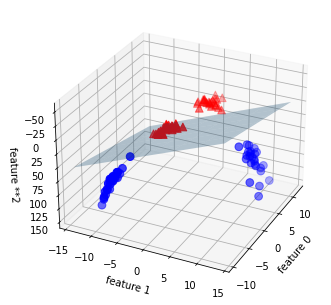

In [39]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

figure = plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',
           cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',
           cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature **2')

Text(0, 0.5, 'Feature 1')

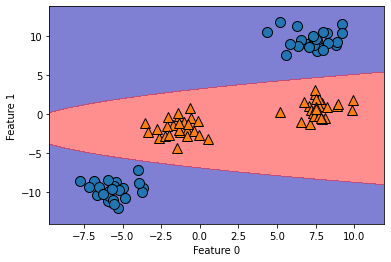

In [40]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')